# Customer Segmentation - Unsupervised Learning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Reading the Dataset...

In [2]:
df = pd.read_excel("Credit Card Customer Data.xlsx")
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


### Serial number is basically index and does not add value... hence dropping..

In [3]:
df = df.drop("Sl_No",axis=1)
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [4]:
df.nunique()

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

### Based on unique values in Customer Key, there are duplicates. Lets find those duplicates...

In [5]:
dups = list(df.loc[df["Customer Key"].duplicated()==True,"Customer Key"])
dups # These are the customer keys that are duplicated.

[47437, 96929, 37252, 50706, 97935]

In [6]:
df[df["Customer Key"]== dups[0]]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0


In [7]:
df[df["Customer Key"]== dups[1]]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2


In [8]:
df[df["Customer Key"]== dups[2]]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2


In [9]:
df[df["Customer Key"]== dups[3]]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2


In [10]:
df[df["Customer Key"]== dups[4]]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


### It appears that the second entry in the dataset is the latest for these duplicates... Hence keeping the last entry and dropping the first..

In [11]:
df = df.drop_duplicates(subset="Customer Key",keep="last")

In [12]:
df.shape

(655, 6)

In [13]:
df.nunique() #The shape and nuniques are in agreement... duplicates are dropped.

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [14]:
df.isna().sum() #There are no null values...

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,655.0,55058.158779,25606.965469,11265.0,33623.5,53898.0,77084.5,99843.0
Avg_Credit_Limit,655.0,34563.358779,37648.200947,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,655.0,4.711450,2.172410,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,655.0,2.404580,1.625385,0.0,1.0,2.0,4.0,5.0
Total_visits_online,655.0,2.601527,2.920192,0.0,1.0,2.0,4.0,15.0
Total_calls_made,655.0,3.575573,2.855867,0.0,1.0,3.0,5.0,10.0


In [16]:
#There is some amount of skeweness in Avg_Credit_Limit

In [17]:
df.Avg_Credit_Limit.skew()

2.2091823808461513

In [18]:
df.dtypes

Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [19]:
df.duplicated().sum() #Double comfirming that duplicates are not there..

0

### Copying the df into another dataframe for preprocessing

In [20]:
dfc = df.copy()

### Dropping the Customer Key since it is now unique and also its just an ID that does not add value to clustering process

In [21]:
dfc = dfc.drop(["Customer Key"], axis=1)

In [22]:
dfc #Customer Key feature is dropped

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
5,20000,3,0,1,8
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [23]:
dfc.duplicated().sum() 
#There are 11 duplicates but since these belong to different cutomers 
#these values are unique in a sense. Hence not dropping it.

11

### Exploratory Data Analysis

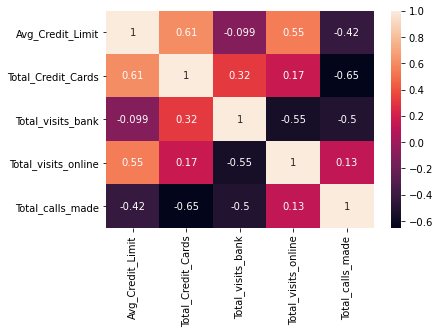

In [24]:
sns.heatmap(dfc.corr(), annot=True, )

#### The heatmap shows there is some correlation between Total Calls Made, Total credit cards and Avg Credit Limit

Text(0.5, 0, 'Total_Calls_made')

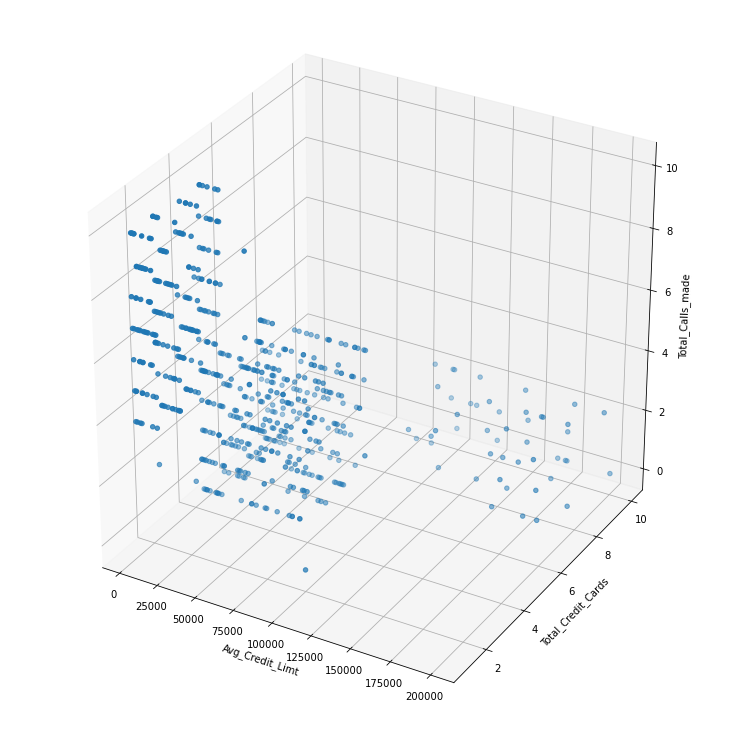

In [25]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,10))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)

surf = ax.scatter(dfc.Avg_Credit_Limit, dfc.Total_Credit_Cards, dfc.Total_calls_made)
ax.set_xlabel('Avg_Credit_Limt')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_Calls_made')

### There appears to be 3 distict groups within this corelation. This is a good value for K in clustering.

Boxplot of Avg_Credit_Limit


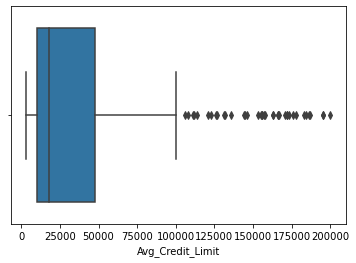

Boxplot of Total_Credit_Cards


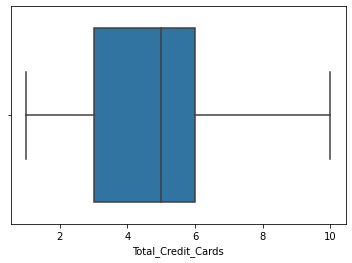

Boxplot of Total_visits_bank


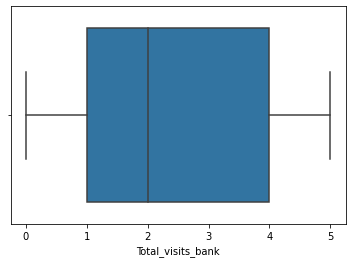

Boxplot of Total_visits_online


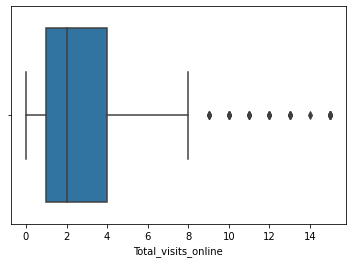

Boxplot of Total_calls_made


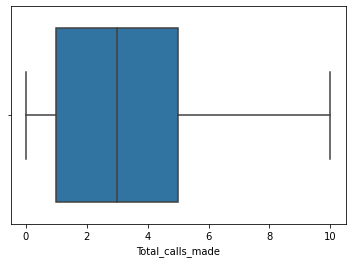

In [26]:
#  Looping to create box plots for each feature
for i in dfc.columns:
    print("Boxplot of",i)
    sns.boxplot(dfc[i])
    plt.show()

Value Counts of Avg_Credit_Limit


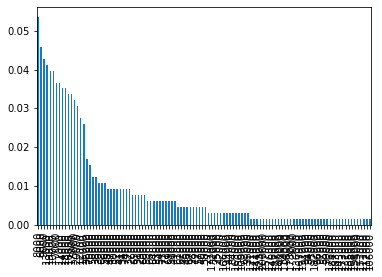

Value Counts of Total_Credit_Cards


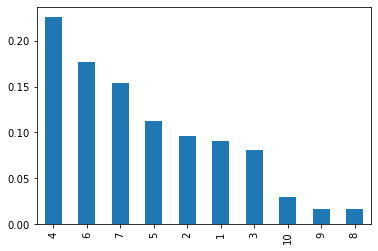

Value Counts of Total_visits_bank


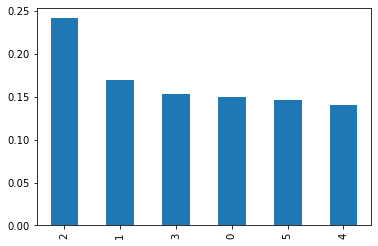

Value Counts of Total_visits_online


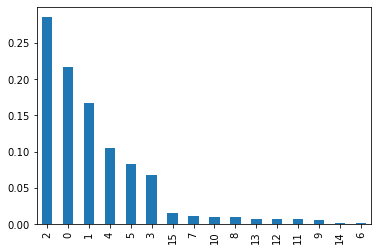

Value Counts of Total_calls_made


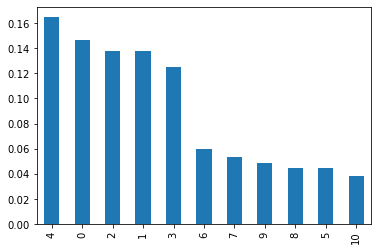

In [27]:
# looping the normalized value count bar plot
for i in dfc.columns:
    print("Value Counts of",i)
    df[i].value_counts(normalize=True).plot.bar()
    plt.show()

KDE of Avg_Credit_Limit


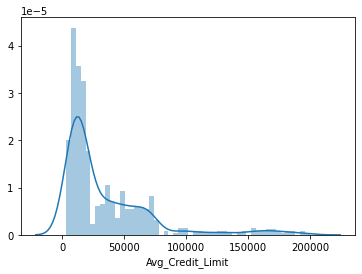

KDE of Total_Credit_Cards


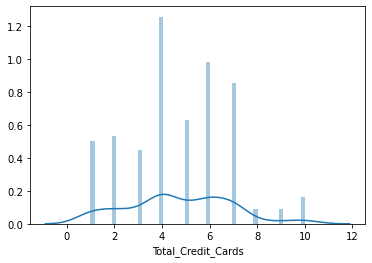

KDE of Total_visits_bank


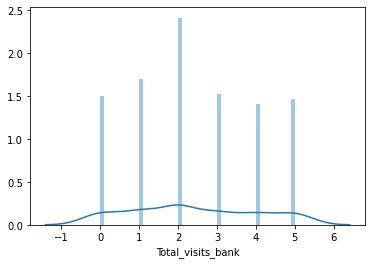

KDE of Total_visits_online


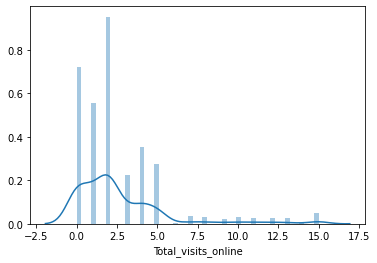

KDE of Total_calls_made


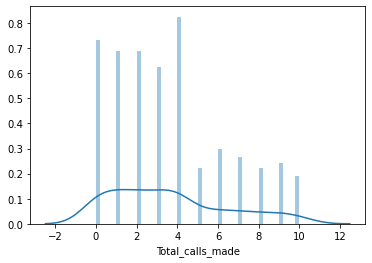

In [28]:
#Looping for kde plot
for i in dfc.columns:
    print("KDE of",i)
    sns.distplot(dfc[i],bins=50)
    plt.show()

#### There is some amount of skeweness in two columns which is evident.. this many not be an issue and can be verified at the end.

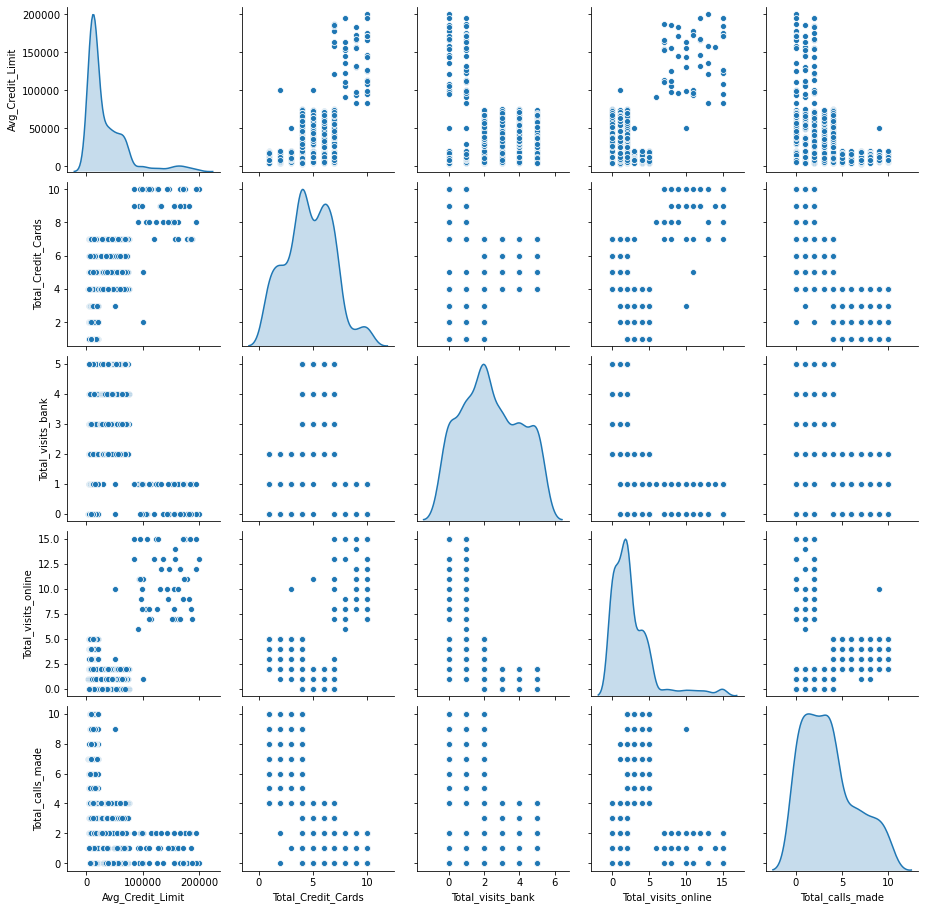

In [29]:
sns.pairplot(dfc, diag_kind="kde")

### Based on the KDE plots it appears there are atleast 3 clusters...

### Performing z-transformation

In [30]:
from scipy.stats import zscore

In [31]:
dfs = dfc.apply(zscore)

In [32]:
dfs

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.739436,-1.249084,-0.864813,-0.548851,-1.252966
1,0.410337,-0.788414,-1.480522,2.535493,1.900849
2,0.410337,1.054266,-0.864813,0.136559,0.148730
3,-0.121303,0.132926,-0.864813,-0.548851,0.148730
5,-0.387123,-0.788414,-1.480522,-0.548851,1.550425
...,...,...,...,...,...
655,1.712854,2.436277,-0.864813,2.535493,-1.252966
656,1.314124,2.436277,-0.864813,3.563608,-0.552118
657,2.935626,1.514937,-0.864813,2.192789,-0.902542
658,3.653340,2.436277,-0.864813,4.249018,-1.252966


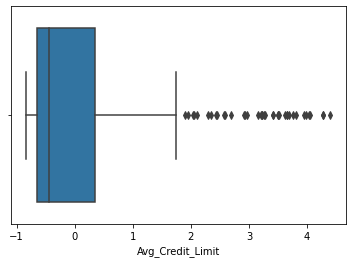

In [33]:
sns.boxplot(dfs.Avg_Credit_Limit)

#### There is skewness in the data even after z-transform. We will try to cluster it as it is by both KMeans and Heirarchical Clustering techniques. If they dont agree with each other, we can try treating the outliers.

### Creating a DataFrame to store Inertia, Silhoutte score values to find the right number of n_clusters for KMeans

In [34]:
k_score = pd.DataFrame(index=range(0,14),columns=["Clusters","Inertia","Silhouette", "Rate"])

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
# Looping the KMeans over 2 to 15 clusters and storing the data in dataframe.
for i in range(2,16):
    k = KMeans(n_clusters=i, n_init=5, random_state=78)
    k.fit(dfs)
    k_score.iloc[i-2,0] = i
    k_score.iloc[i-2,1] = k.inertia_
    k_score.iloc[i-2,2] = silhouette_score(dfs,k.labels_)

In [37]:
k_score.iloc[0,3] = np.inf #calculating the difference between subsequest inertia values...
for i in range(1,14):
    k_score.iloc[i,3] = k_score.iloc[i,1] - k_score.iloc[i-1,1]

In [38]:
k_score = k_score.astype("float") #changing from "object" to "float"

In [39]:
k_score

,Clusters,Inertia,Silhouette,Rate
0,2.0,2023.593267,0.419105,inf
1,3.0,926.372729,0.515676,-1097.220538
2,4.0,774.569116,0.355435,-151.803613
3,5.0,698.894726,0.272267,-75.674390
4,6.0,636.803092,0.255464,-62.091634
5,7.0,598.898314,0.235094,-37.904778
6,8.0,560.874849,0.228896,-38.023465
7,9.0,531.438554,0.212719,-29.436295
8,10.0,505.448919,0.214001,-25.989635
9,11.0,482.007504,0.214054,-23.441415


### The rate column is the rate of drop in inertia_

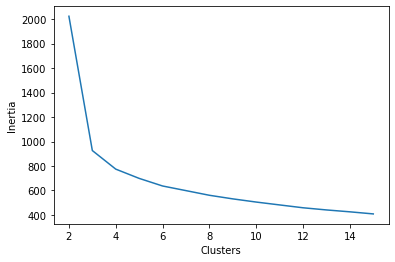

In [40]:
sns.lineplot( x=k_score["Clusters"],y=k_score["Inertia"])

### Clearly there is an elbow at K=3

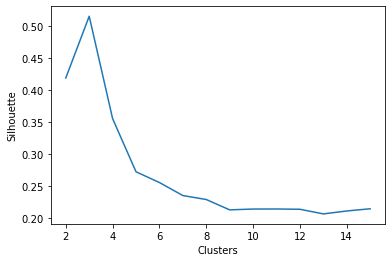

In [41]:
sns.lineplot( x=k_score["Clusters"],y=k_score["Silhouette"])

### The Silhouette is high at K=3

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer

C:\Users\AGouda2\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


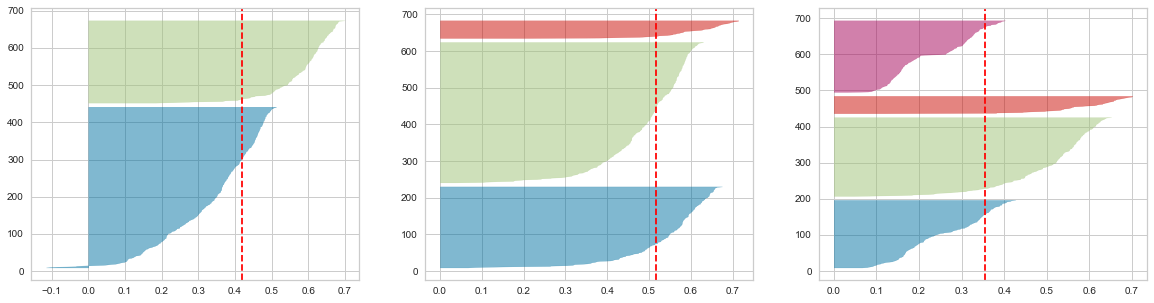

In [43]:
#Plotting Silhouette Plots
plt.figure(figsize=(20,5))
j=1
for i in range(2,5):
    plt.subplot(1,3,j)
    model = KMeans(n_clusters=i,n_init=10,random_state=78)
    v = SilhouetteVisualizer(model,colors="yellowbrick")
    v.fit(dfs)
    j += 1

### From above assessment based on Elbow plot, Silhouette values and Silhouette plots it is clear that there are 3 clusters

### Final KMeans Model

In [44]:
final_model = KMeans(n_clusters=3,n_init=10,random_state=78)

In [45]:
final_model.fit(dfs)

KMeans(n_clusters=3, random_state=78)

In [46]:
final_model.labels_

array([2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [47]:
df["Cluster_K"] = final_model.labels_
dfs["Cluster_K"] = final_model.labels_
#Storing labels in dataframes

In [48]:
dfs["Cluster_K"] = dfs["Cluster_K"].astype("category")
#Changing the category to non-numeric

In [49]:
df["Cluster_K"].value_counts()

2    384
1    222
0     49
Name: Cluster_K, dtype: int64

## Attempting Hierarchical Clustering using Scipy Module

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from scipy.spatial.distance import pdist

In [51]:
metric_data = pd.DataFrame(columns=["Linkage","Distance","C_Score"])

In [52]:
method = ["ward","complete", "average", "single"]

In [53]:
link, distance, score = [],[],[]
#Creating empty arrays to store the calculated variables..

### Calculating Cophenetic Coeff for various combination of linkages and distance...

In [54]:
#Looping for vaious combinations...
for i in method:
    #Ward method works only with euclidean distance. Hence creating a condition within the loop
    if i == "ward":
        Z = linkage(dfs, method=i, metric="euclidean")
        c, coph_dist = cophenet(Z, pdist(dfs))
        link.append(i)
        score.append(c)
        distance.append("euclidean")
    else:
        for j in ["euclidean", "minkowski", "cosine", "cityblock", "correlation","jaccard","chebyshev","mahalanobis"]:
            Z = linkage(dfs, method=i, metric=j)
            c, coph_dist = cophenet(Z, pdist(dfs))
            link.append(i)
            score.append(c)
            distance.append(j)

In [55]:
#Creating dataframe from 3 arrays..

hei_score = pd.DataFrame(list(zip(link, distance,score)), columns =['Linkage', "Distance",'C']) 

In [56]:
hei_score #complete list of scores for vaious combinations...

,Linkage,Distance,C
0,ward,euclidean,0.772792
1,complete,euclidean,0.884218
2,complete,minkowski,0.884218
3,complete,cosine,0.798949
4,complete,cityblock,0.885233
5,complete,correlation,0.786515
6,complete,jaccard,0.674466
7,complete,chebyshev,0.868819
8,complete,mahalanobis,0.677698
9,average,euclidean,0.916940


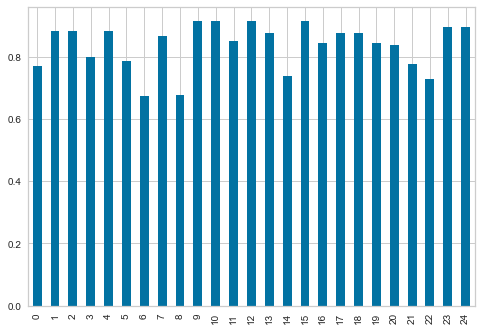

In [57]:
hei_score["C"].plot.bar()

In [58]:
hei_score[hei_score["C"] == hei_score.C.max()]
#Displyaing the the MAX value of C

,Linkage,Distance,C
9,average,euclidean,0.91694
10,average,minkowski,0.91694


## Choosing Linkage = Average and Distance = Euclidean

In [59]:
#Final Model
Z = linkage(dfs, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(dfs))

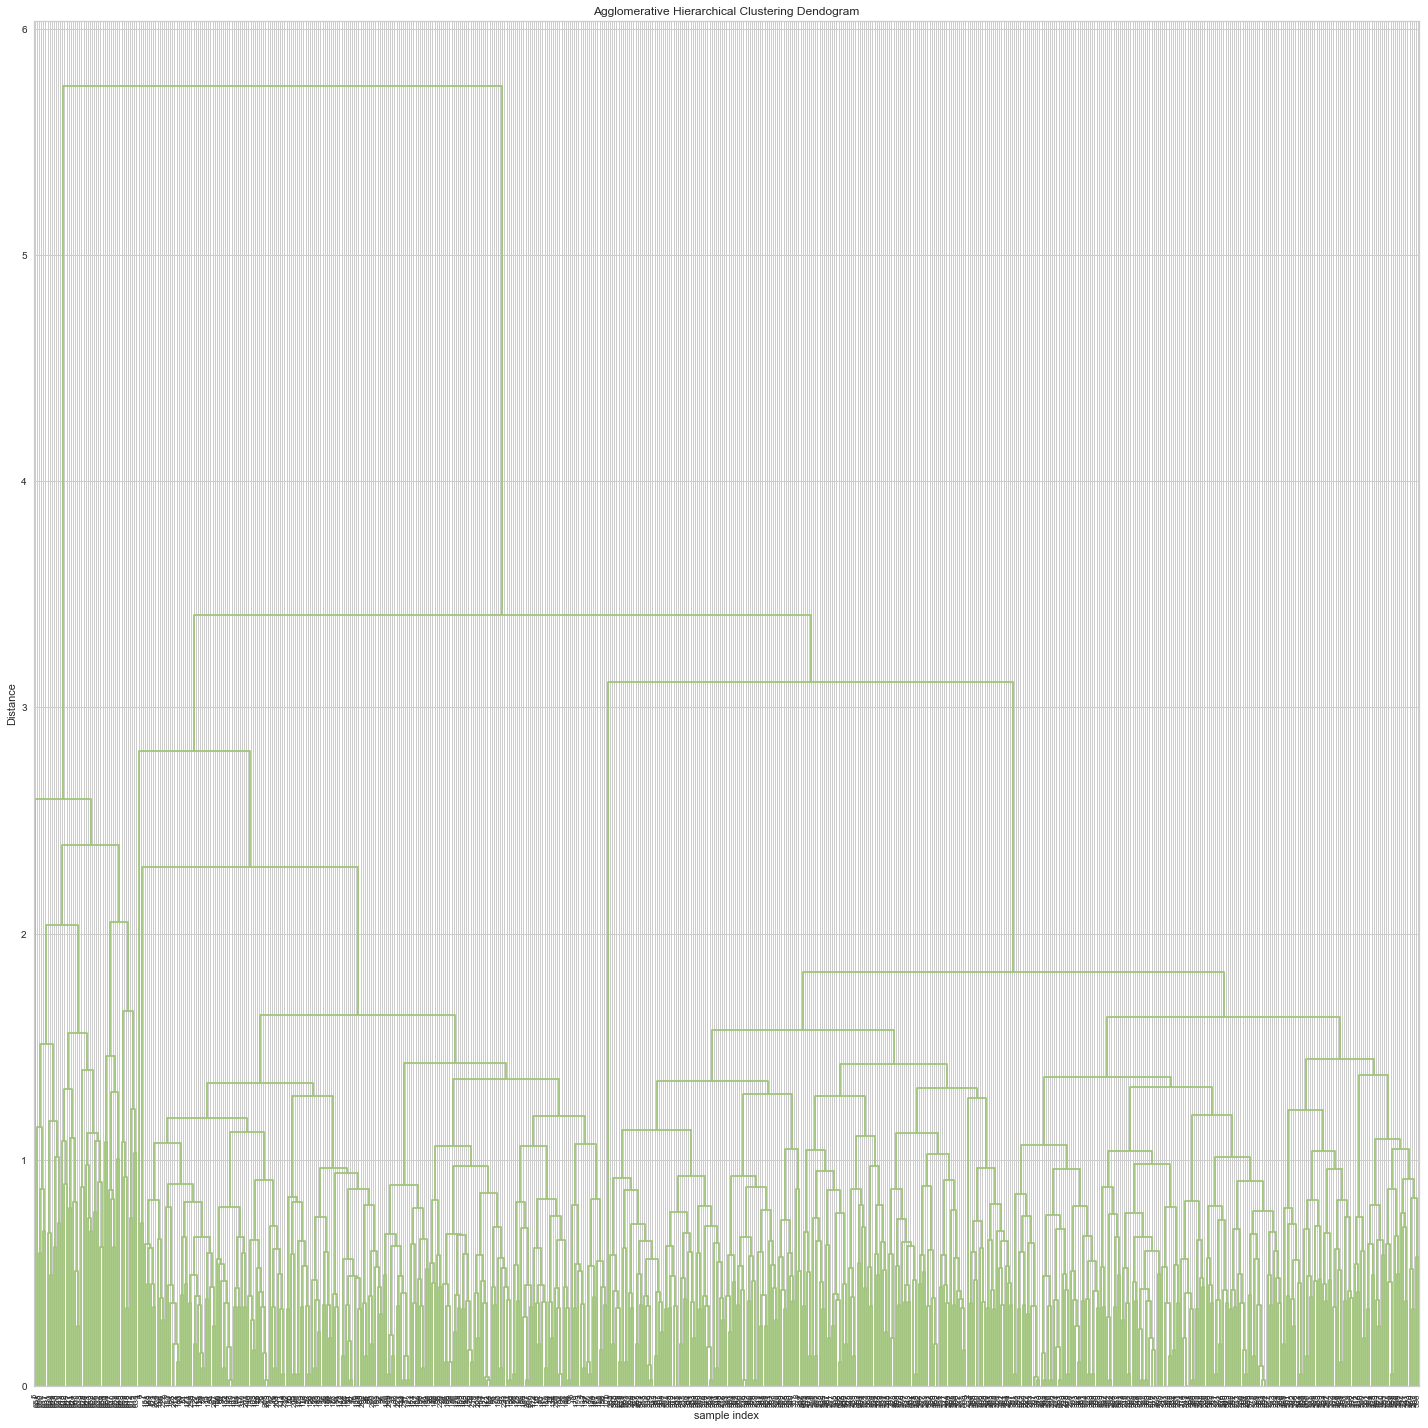

In [60]:
#Plotting Dendrogram
plt.figure(figsize=(20, 20))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.)
plt.tight_layout()

### To determine the best number of clusters, plotting dendrogram for 2 to 5 clusters

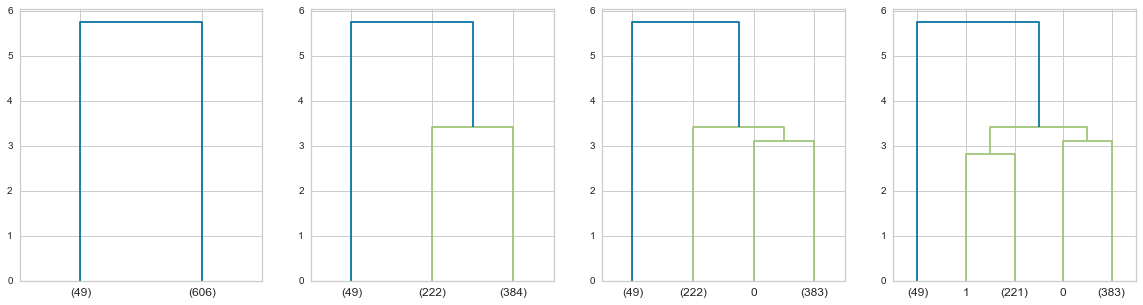

In [61]:
j=1
plt.figure(figsize=(20,5))
for i in range(2,6):
    plt.subplot(1,4,j)
    dendrogram(Z, truncate_mode="lastp",p=i)
    j += 1

### Clearly the best clustering is at K=3 with better distribution..

### The red horizontal line below indicates the threshold for 3 clusters which is 3.2

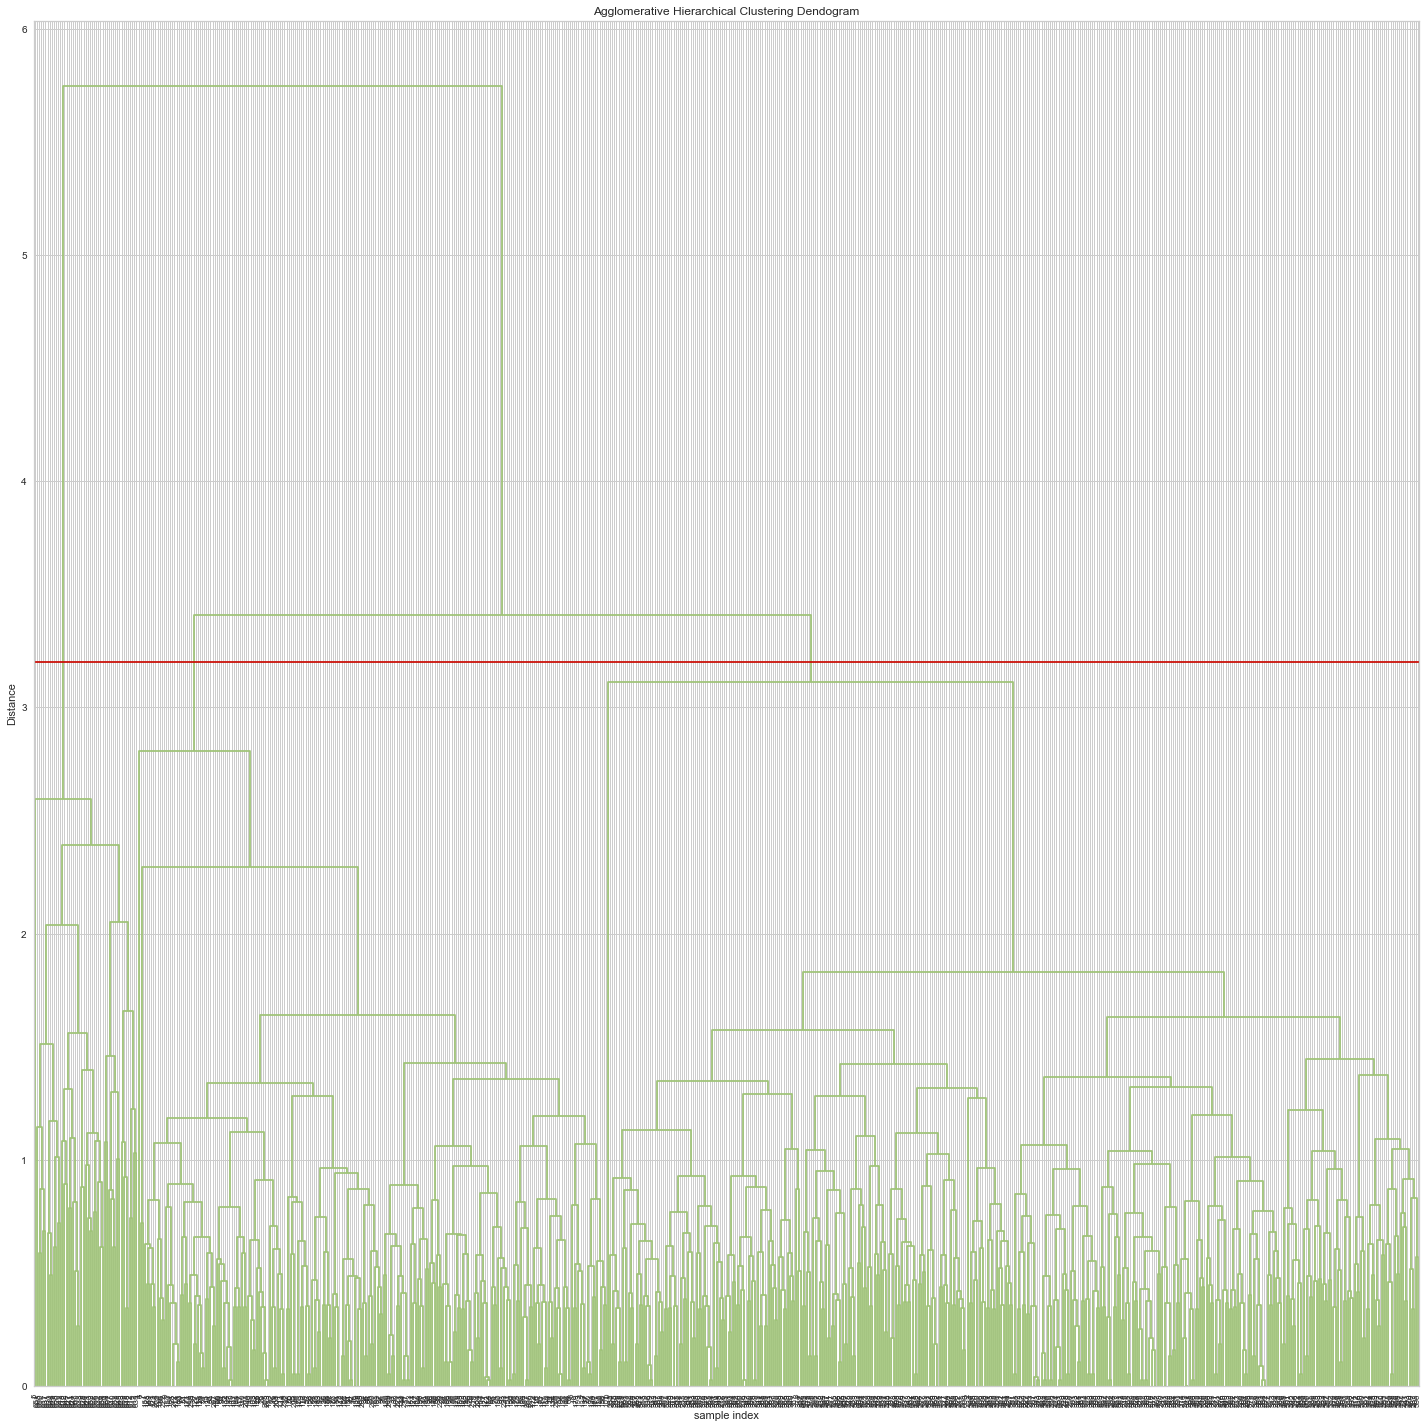

In [62]:
plt.figure(figsize=(20, 20))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()
plt.axhline(3.2,c="r")

In [63]:
#Creating cluster labels for threshold = 3.2 
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 3.2, criterion='distance')
clusters

array([3, 2, 3, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [64]:
silhouette_score(dfs,clusters)

0.5410850172396671

In [65]:
df["Cluster_H"] = clusters
dfs["Cluster_H"] = clusters

#Storing the clusters labels in dataframe

In [66]:
df["Cluster_H"] = df["Cluster_H"].astype("category")
dfs["Cluster_H"] = dfs["Cluster_H"].astype("category")

#changing the category to non-numeric

## Comparing Labels/Clusters from KMeans (Clusters_K) and from Hierarchical clustering (Clusters_H)

In [67]:
dfs["Cluster_K"].value_counts()

2    384
1    222
0     49
Name: Cluster_K, dtype: int64

In [68]:
dfs["Cluster_H"].value_counts()

3    384
2    222
1     49
Name: Cluster_H, dtype: int64

### The distribution is spot on between KMeans and Hierarchical... Each cluster having exact number of members...

In [69]:
silhouette_score(dfs,dfs["Cluster_K"])

0.562067373102653

In [70]:
silhouette_score(dfs,dfs["Cluster_H"])

0.562067373102653

### The silhouette_score is ditto for both the clutering techniques

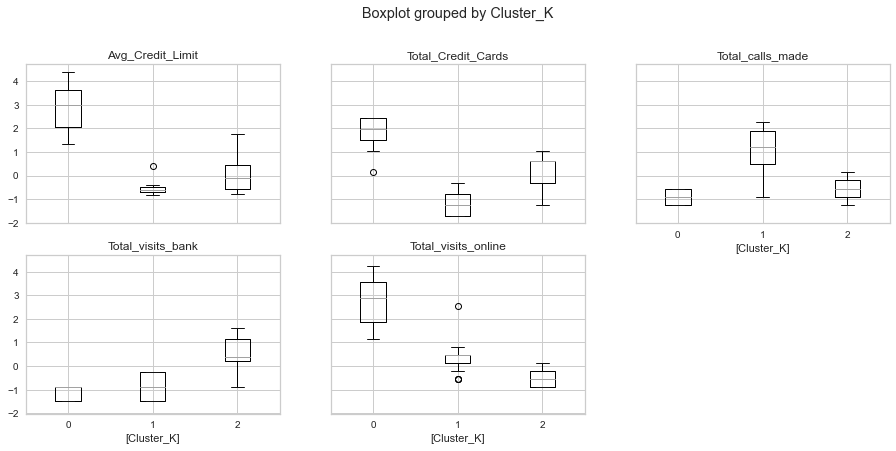

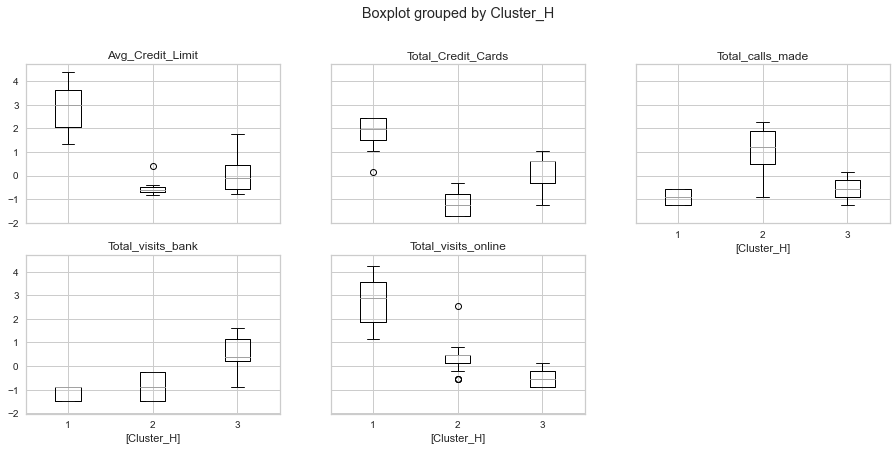

In [71]:
dfs.boxplot(by = 'Cluster_K',  layout=(3,3), figsize=(15, 10))
dfs.boxplot(by = 'Cluster_H',  layout=(3,3), figsize=(15, 10))
plt.show()

In [81]:
dfs.groupby("Cluster_H").mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster_H,,,,,
1,2.852625,1.881592,-1.103557,2.836235,-0.888239
2,-0.594990,-1.062326,-0.903641,0.331067,1.147911
3,-0.020029,0.374058,0.663236,-0.553313,-0.550293


In [82]:
dfs.groupby("Cluster_K").mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster_K,,,,,
0,2.852625,1.881592,-1.103557,2.836235,-0.888239
1,-0.594990,-1.062326,-0.903641,0.331067,1.147911
2,-0.020029,0.374058,0.663236,-0.553313,-0.550293


## ANALYSIS & Cluster Characteristics

> Going by "Cluster_H" Labels...

Cluster 1 is characterised by
    
    a) High Avg Credit Limit
    b) Comparatively own more number of credit cards
    c) Highly prefer online banking
    
Cluster 2 is characterised by
    
    a) Low Avg Credit Limit
    b) Comparatively own fewer number of credit cards
    c) Prefer calling over bank visits and online banking
    
Cluster 3 is characterised by
    
    a) Moderate Avg Credit Limit
    b) Own moderate number of credit cards
    c) Highly prefer visiting banks over calling or online banking
    

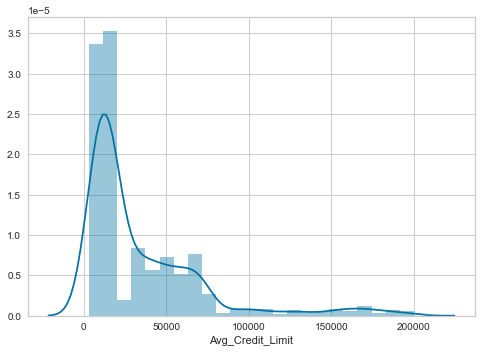

In [73]:
#Treating the outliers is no necessary since the clustering is spot-on with distinct characteristic...
sns.distplot(df.Avg_Credit_Limit)

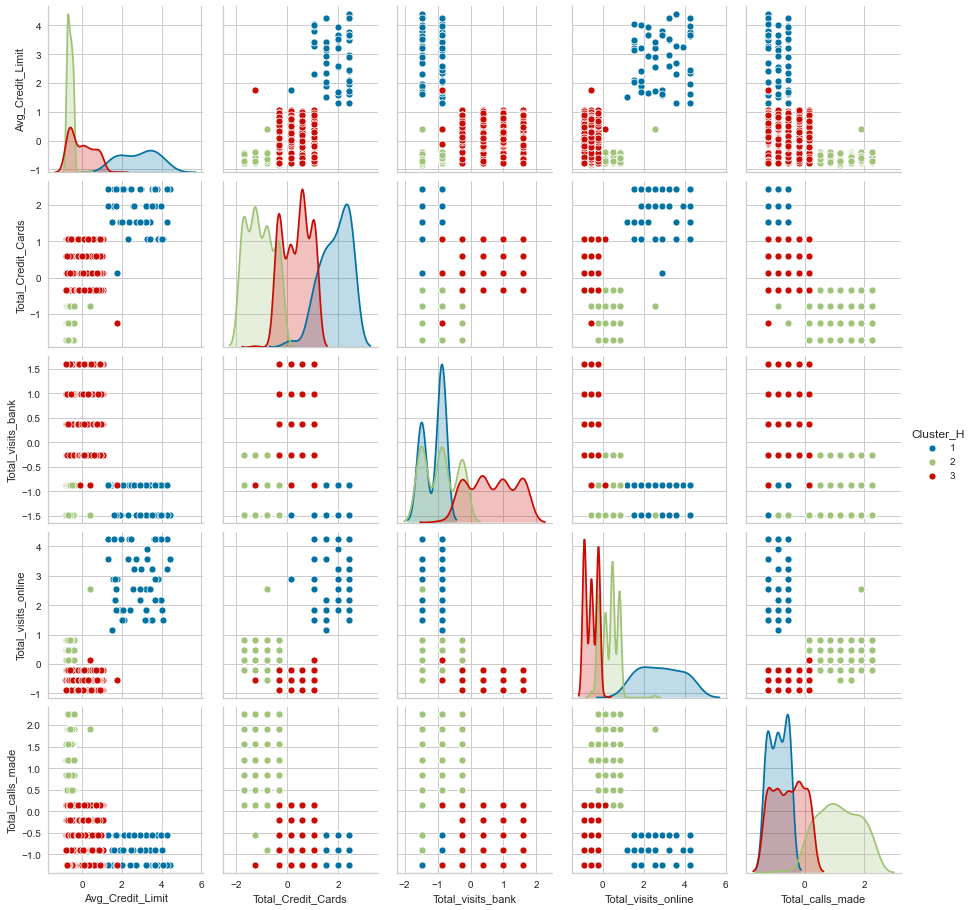

In [74]:
#Pair Plot with Hue as Cluster H labels

sns.pairplot(data=dfs.drop("Cluster_K",axis=1), hue="Cluster_H")

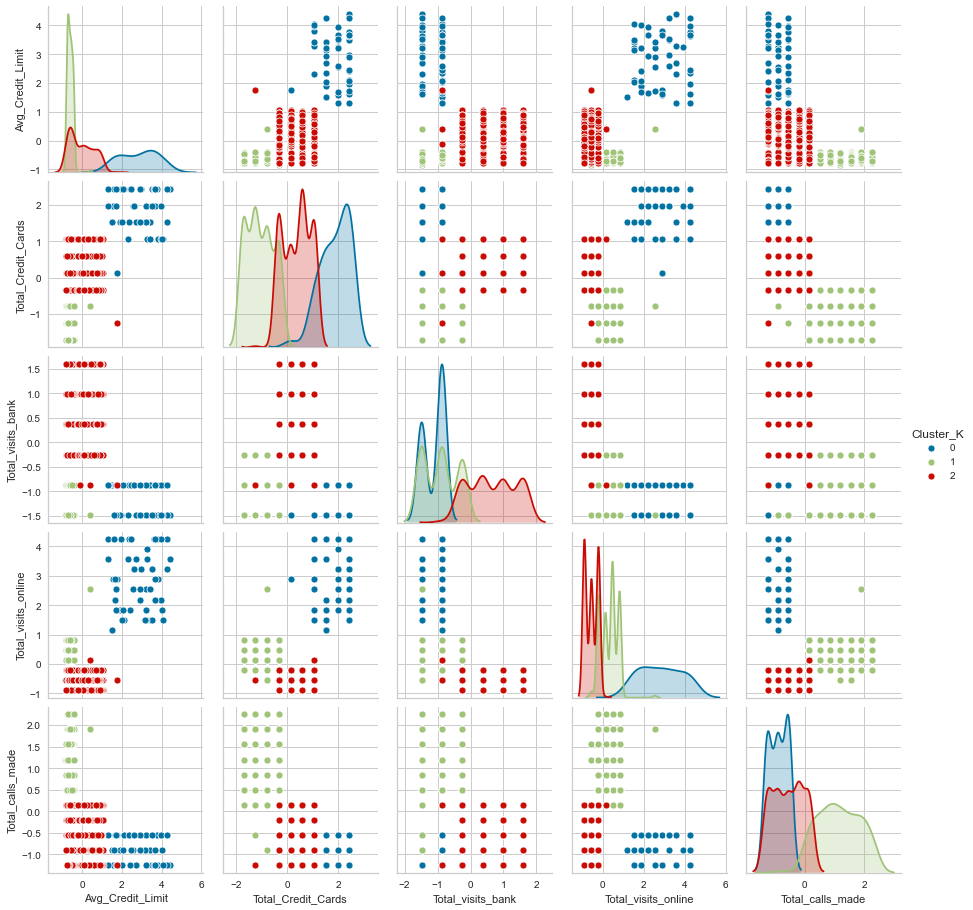

In [75]:
#Pair Plot with Hue as Cluster K labels

sns.pairplot(data=dfs.drop("Cluster_H",axis=1), hue="Cluster_K")

In [76]:
# From the above pait plots, the distribution is exactly same for clusters for both methods...

Text(0.5, 0, 'Total_Calls_made')

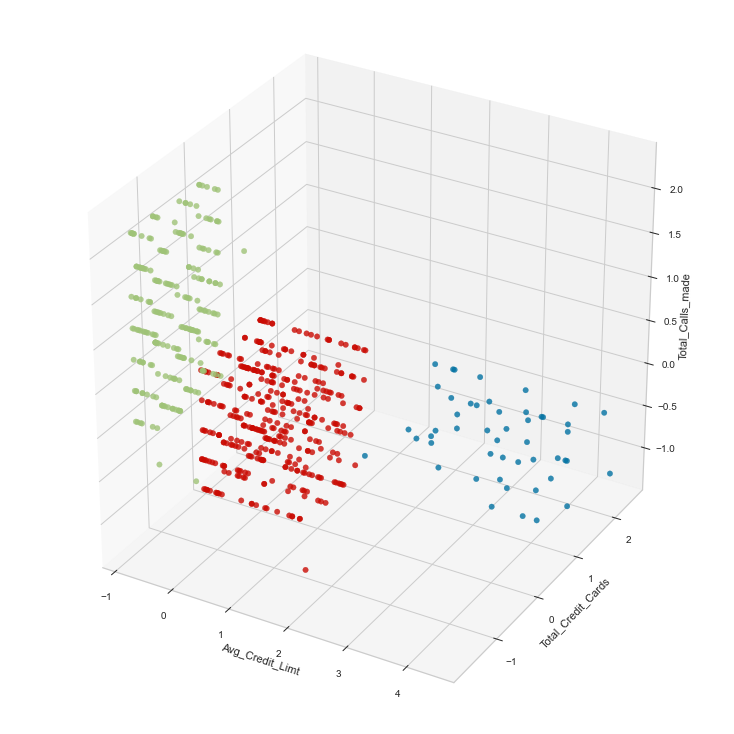

In [77]:
#3D scatter plot shows th clusters with 3 features that were somewhat correlated.

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

surf = ax.scatter(dfs.loc[df["Cluster_H"]==1,"Avg_Credit_Limit"], dfs.loc[df["Cluster_H"]==1,"Total_Credit_Cards"], dfs.loc[df["Cluster_H"]==1,"Total_calls_made"],alpha=0.8,s=30)
surf = ax.scatter(dfs.loc[df["Cluster_H"]==2,"Avg_Credit_Limit"], dfs.loc[df["Cluster_H"]==2,"Total_Credit_Cards"], dfs.loc[df["Cluster_H"]==2,"Total_calls_made"],alpha=0.8, s=30)
surf = ax.scatter(dfs.loc[df["Cluster_H"]==3,"Avg_Credit_Limit"], dfs.loc[df["Cluster_H"]==3,"Total_Credit_Cards"], dfs.loc[df["Cluster_H"]==3,"Total_calls_made"],alpha=0.8,s=30)
ax.set_xlabel('Avg_Credit_Limt')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_Calls_made')

Boxplot of Avg_Credit_Limit


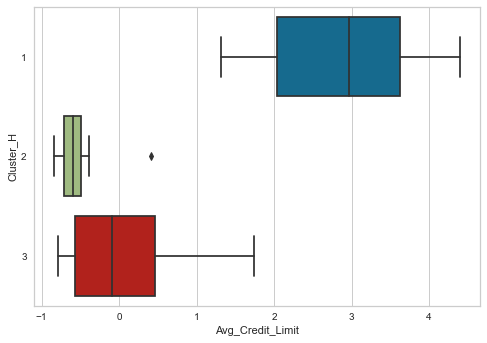

Boxplot of Total_Credit_Cards


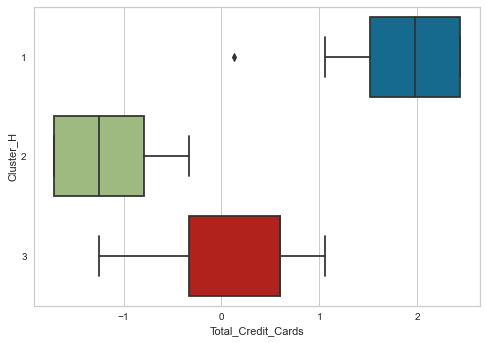

Boxplot of Total_visits_bank


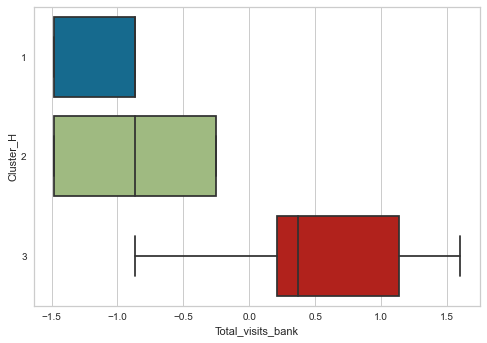

Boxplot of Total_visits_online


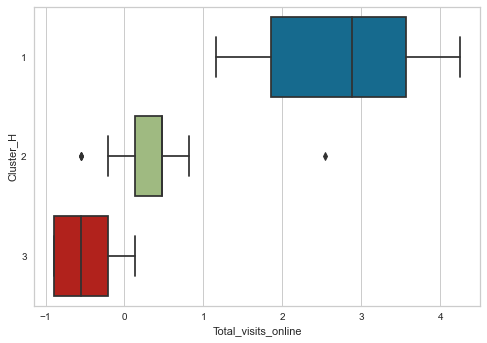

Boxplot of Total_calls_made


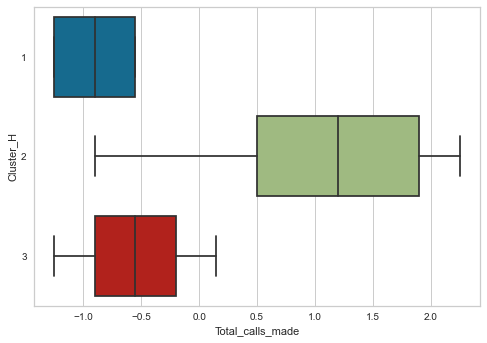

In [78]:
#  Looping to create box plots for each feature now with hue based on Cluster_H
for i in dfc.columns:
    print("Boxplot of",i)
    sns.boxplot(x=dfs[i],y=dfs["Cluster_H"])
    plt.show()

In [79]:
#The boxplot show that the IQRs are suffeciently distinct with non-overlapping mean. The clusters are "healthy"

---End---

In [80]:
#clusteval